In [84]:
import numpy as np
import math
np.random.seed(4294967295) # random seed for consistency

mu_vec1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
cov_mat1 = np.identity(15)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 500).T
all_samples = class1_sample

In [63]:
all_samples

array([[ 0.64840867,  1.43319167, -0.02745217, ..., -1.31181762,
         0.85355691, -1.05544876],
       [ 0.66932353,  0.08608548, -0.92220214, ..., -0.12455405,
        -0.07927048,  1.99010091],
       [-1.08054372, -0.40130591,  0.10243261, ..., -0.73013515,
         0.7101873 ,  0.28438898],
       ..., 
       [ 0.64437451, -1.33863303, -0.47391497, ...,  1.57197794,
        -0.41050206, -0.49223922],
       [-1.38537865, -1.07992531,  0.41299248, ..., -0.7250656 ,
        -0.20540389, -1.10797558],
       [ 0.42005442, -0.52086811,  1.22729354, ...,  1.17733235,
         1.17569786,  0.83580586]])

In [52]:
from sklearn.decomposition import PCA as sklearnPCA

In [53]:
print np.shape(all_samples.T)
pca = sklearnPCA(n_components=5)
fitted = pca.fit(all_samples.T)
trans = pca.transform(all_samples.T)
print np.shape(trans)

(500, 15)
(500, 5)


Populating the interactive namespace from numpy and matplotlib


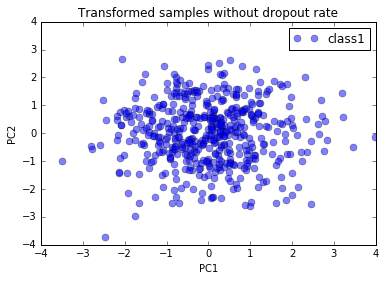

In [54]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

In [55]:
original = np.dot(trans, pca.components_) + pca.mean_

In [68]:
original *= -1
original[0][:5]

array([-0.04449684,  0.02065447, -0.05759215,  0.24279837,  0.09674501])

In [56]:
fitted = pca.fit(original)
trans1 = pca.transform(original)

In [83]:
for (i,j), value in numpy.ndenumerate(all_samples):
    if (np.round(value, 5) == np.round(0.24279837, 5)):
        print(i, j)

Populating the interactive namespace from numpy and matplotlib


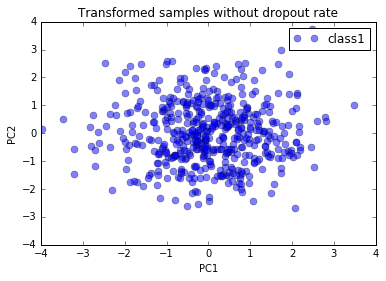

In [78]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

plt.plot(trans1[:,0],trans1[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

In [59]:
np.allclose(trans1, trans)

False

In [60]:
trans1 * -1

array([[-0.85447179,  0.25253401,  0.37735721, -0.30110082, -0.19726115],
       [ 0.14192143, -0.22229883, -1.00791108, -0.19200058,  0.95481386],
       [ 0.27340582,  0.40422224, -1.20605219, -0.97334462, -0.00753592],
       ..., 
       [ 0.38574004, -0.11384093,  2.28084007, -0.24361903, -0.45736568],
       [ 1.19325642,  0.7390289 ,  1.30325713, -1.24734817,  0.29559659],
       [ 1.06237392,  0.39405157,  1.20675601, -1.87511376, -0.46928467]])

In [61]:
trans

array([[-0.85447179,  0.25253401,  0.37735721,  0.30110082, -0.19726115],
       [ 0.14192143, -0.22229883, -1.00791108,  0.19200058,  0.95481386],
       [ 0.27340582,  0.40422224, -1.20605219,  0.97334462, -0.00753592],
       ..., 
       [ 0.38574004, -0.11384093,  2.28084007,  0.24361903, -0.45736568],
       [ 1.19325642,  0.7390289 ,  1.30325713,  1.24734817,  0.29559659],
       [ 1.06237392,  0.39405157,  1.20675601,  1.87511376, -0.46928467]])

In [51]:
all_samples.T

array([[ 0.64840867,  0.66932353, -1.08054372, ...,  0.64437451,
        -1.38537865,  0.42005442],
       [ 1.43319167,  0.08608548, -0.40130591, ..., -1.33863303,
        -1.07992531, -0.52086811],
       [-0.02745217, -0.92220214,  0.10243261, ..., -0.47391497,
         0.41299248,  1.22729354],
       ..., 
       [-1.31181762, -0.12455405, -0.73013515, ...,  1.57197794,
        -0.7250656 ,  1.17733235],
       [ 0.85355691, -0.07927048,  0.7101873 , ..., -0.41050206,
        -0.20540389,  1.17569786],
       [-1.05544876,  1.99010091,  0.28438898, ..., -0.49223922,
        -1.10797558,  0.83580586]])